<div class='bar_title'></div>

*Data Driven Decisions in Practice (D3IP): Urban Analytics*

# Case Study: Predicting AirBnB Accomodation Prices

Gunther Gust & Nikolai Stein

Data Driven Decisions (D3) Group <br>
Center for Artificial Intelligence & Data Science <br>



<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

Complete the case study outlined by the steps below. Remember to always comment your code and document your findings so that your notebook is easy to read and follow! (Apart from correctness, the style of the notebook will also affect your grade!)



# PART 1: Data Loading and Exploratory Data Analysis

Insructions:

* Load the `airbnb.geojson` file into this notebook as a geodataframe
* Explore the content of each column of the geodataframe using methods of your choice (descriptive statistics, plots etc.). Describe your findings in the markdown cells.
* Create a plot that displays the location of the airbnb listings and the price. Add a basemap of San Diego to the plot.

In [104]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt 
import seaborn as sns
import contextily as cx

+ *Load the geodataframe*

In [105]:
# Load the geodataframe 
import geopandas as gpd
Airbnb_listings = gpd.read_file('airbnb_listings.geojson')
print(Airbnb_listings.head())

   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse  price  \
0               0         1         0             0  425.0   
1               1         0         0             0  205.0   
2               0         0         0             0   99.0   
3               0         1         0             0   72.0   
4               0         1         0             0   55.0   

                      geometry  
0  POINT (-117.12971 32.75399)  
1  POINT (-117.25253 32.78421)  
2  POINT (-117.14121 32.75327)  
3  POINT (-117.15269

These are the variables you should analyze and later use to predict the `price`:

In [106]:
variable_names = [
    "accommodates",  # Number of people it accommodates
    "bathrooms",  # Number of bathrooms
    "bedrooms",  # Number of bedrooms
    "beds",  # Number of beds
    # Below are binary variables, 1 True, 0 False
    "rt_Private_room",  # Room type: private room
    "rt_Shared_room",  # Room type: shared room
    "pg_Condominium",  # Property group: condo
    "pg_House",  # Property group: house
    "pg_Other",  # Property group: other
    "pg_Townhouse",  # Property group: townhouse
]

+ *Explore the content of each column*

In [107]:
# Descriptive statistics for numerical columns
numerical_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']
descriptive_stats = Airbnb_listings[numerical_columns].describe()

# Display the descriptive statistics
descriptive_stats


,accommodates,bathrooms,bedrooms,beds,price
count,6110.000000,6110.000000,6110.000000,6110.000000,6110.000000
mean,4.220786,1.475286,1.589198,2.196399,215.967594
std,2.840703,0.863803,1.136234,1.712917,277.549832
min,1.000000,0.000000,0.000000,0.000000,18.000000
25%,2.000000,1.000000,1.000000,1.000000,85.000000
50%,4.000000,1.000000,1.000000,2.000000,139.000000
75%,6.000000,2.000000,2.000000,3.000000,250.000000
max,21.000000,10.000000,10.000000,16.000000,4900.000000


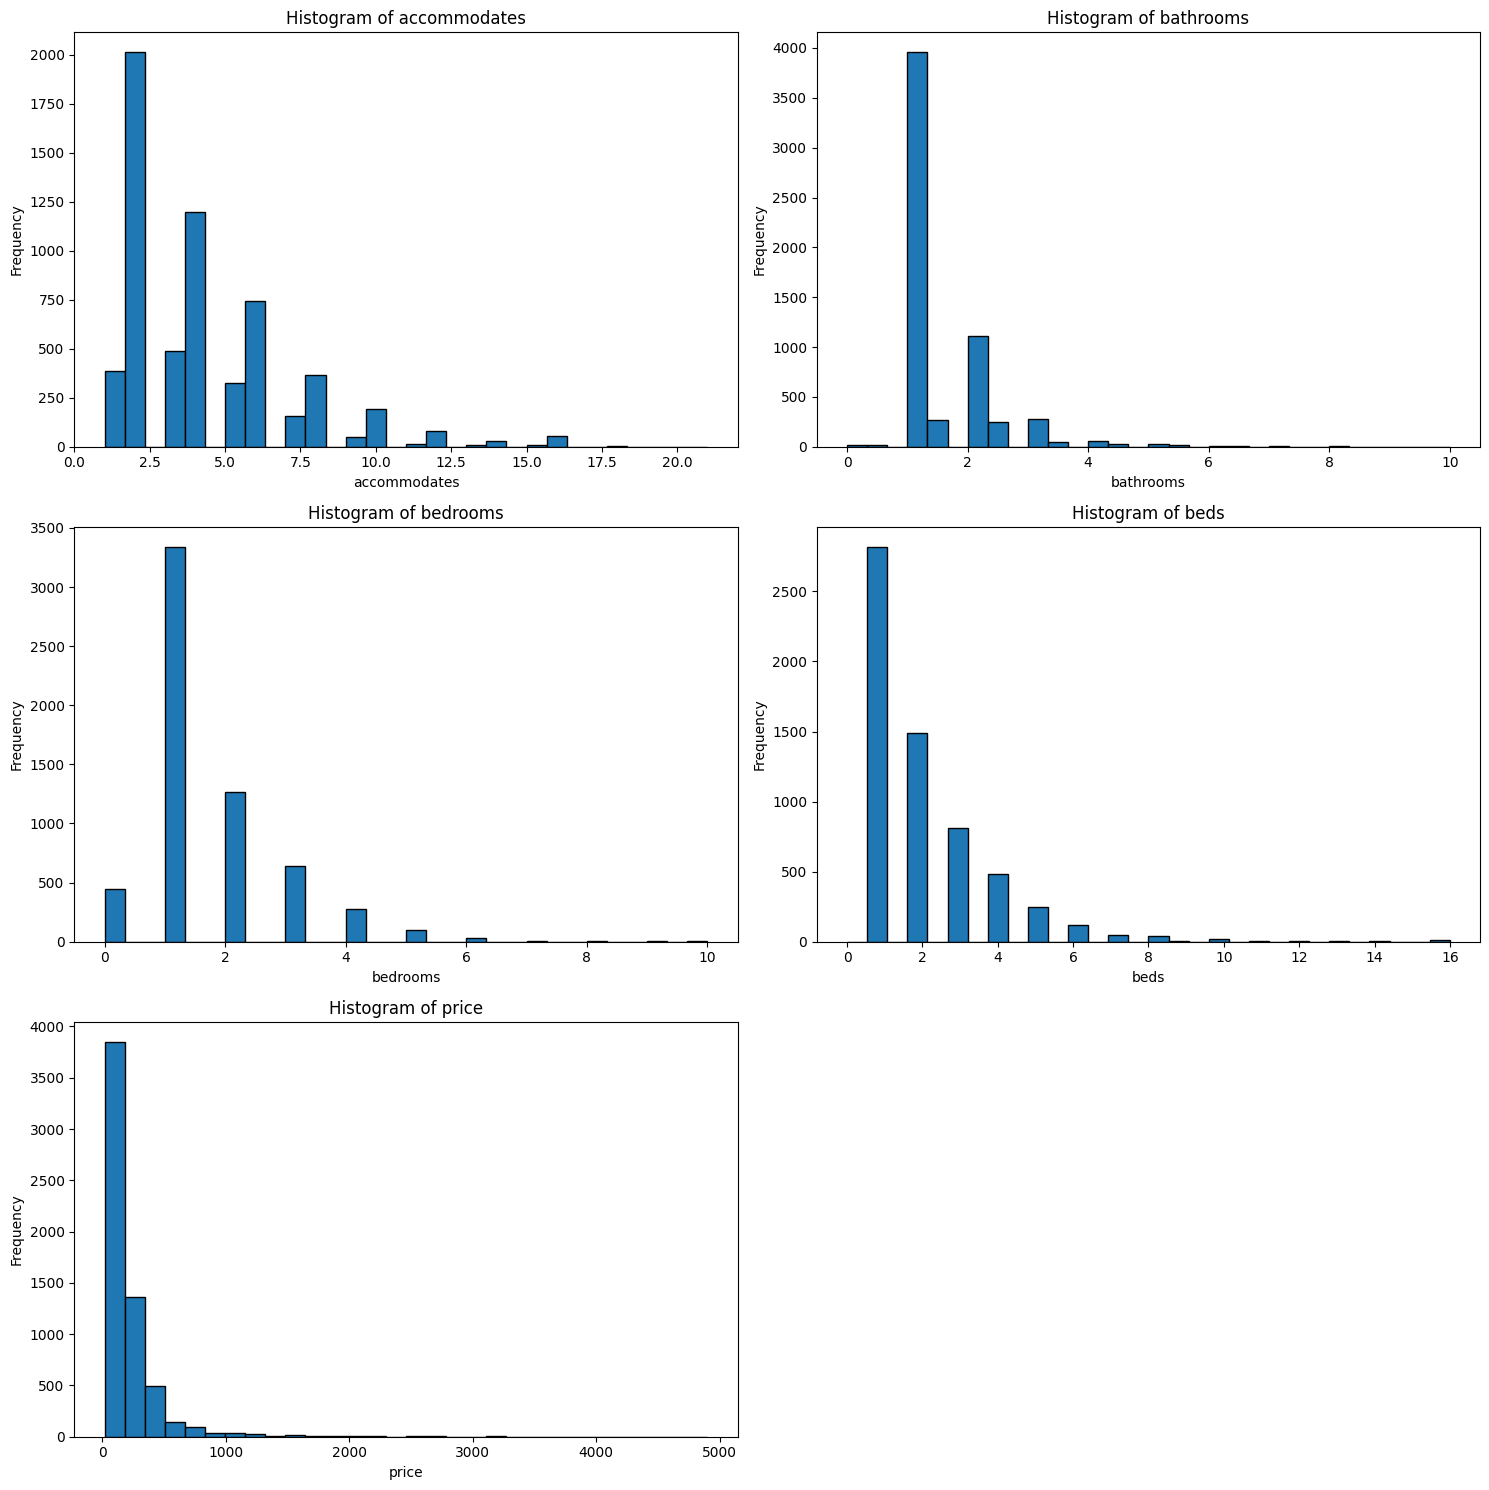

In [108]:
# Histograms for numerical columns

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, column in enumerate(numerical_columns):
    ax = axes.flatten()[i]
    Airbnb_listings[column].plot.hist(ax=ax, bins=30, edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

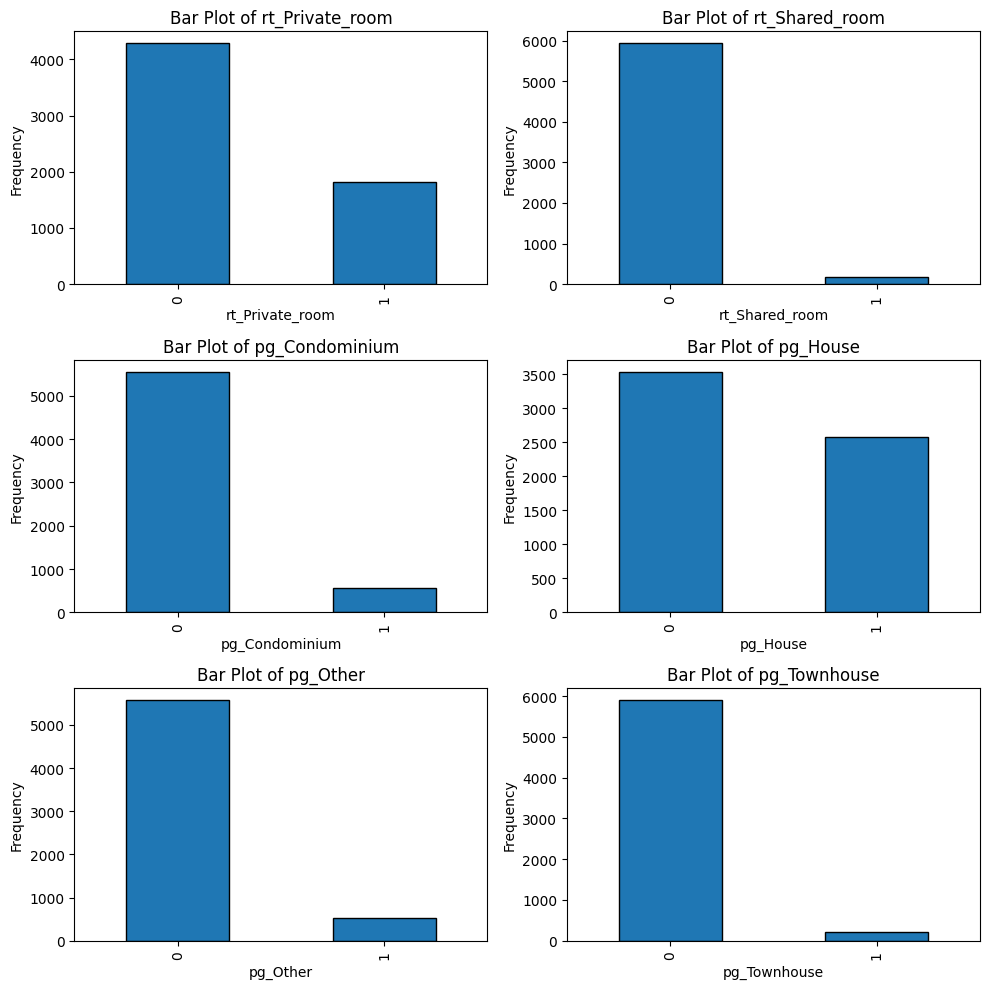

In [109]:
# Bar plots for categorical columns
categorical_columns = ['rt_Private_room', 'rt_Shared_room', 'pg_Condominium', 'pg_House', 'pg_Other', 'pg_Townhouse']

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for i, column in enumerate(categorical_columns):
    ax = axes.flatten()[i]
    Airbnb_listings[column].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f'Bar Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

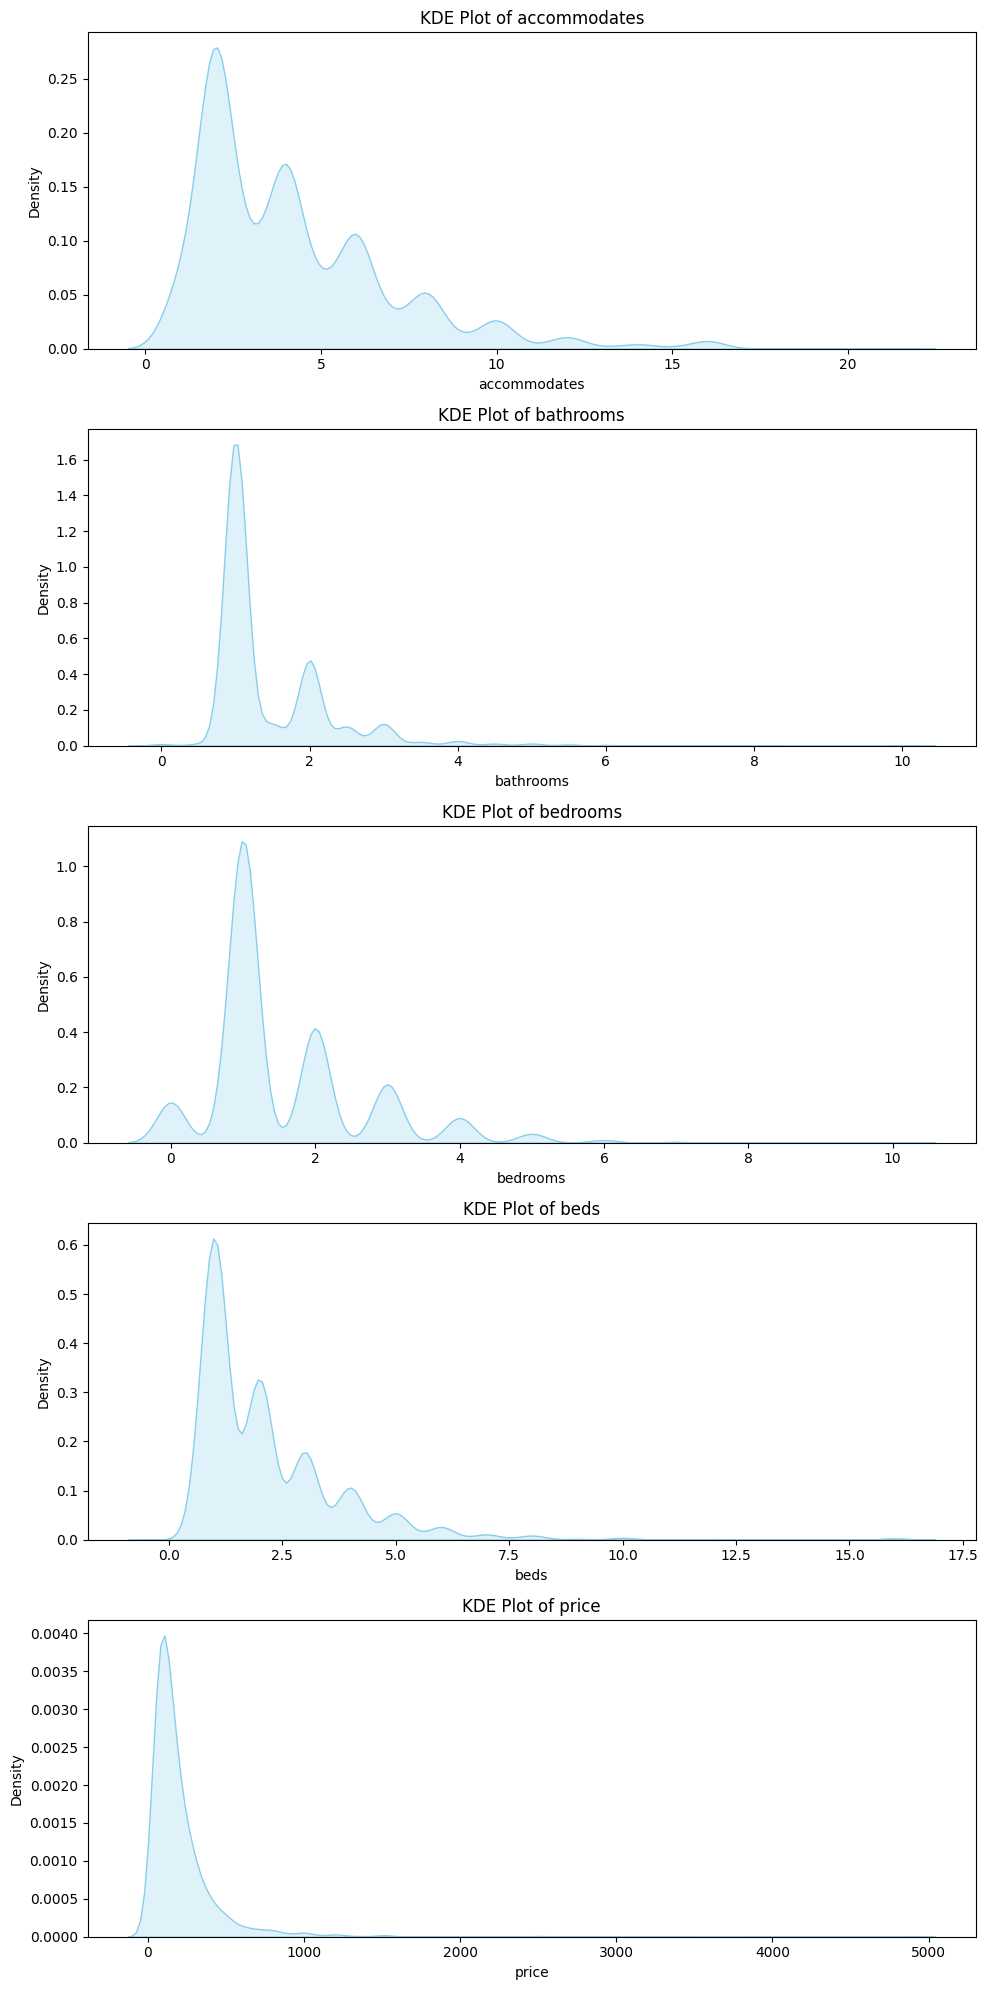

In [110]:
# Define numerical columns
numerical_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']

# Create KDE plots for numerical columns
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))

for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=Airbnb_listings, x=column, ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'KDE Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

+ *Create a Plot to Display the Location and Price of Airbnb Listings*

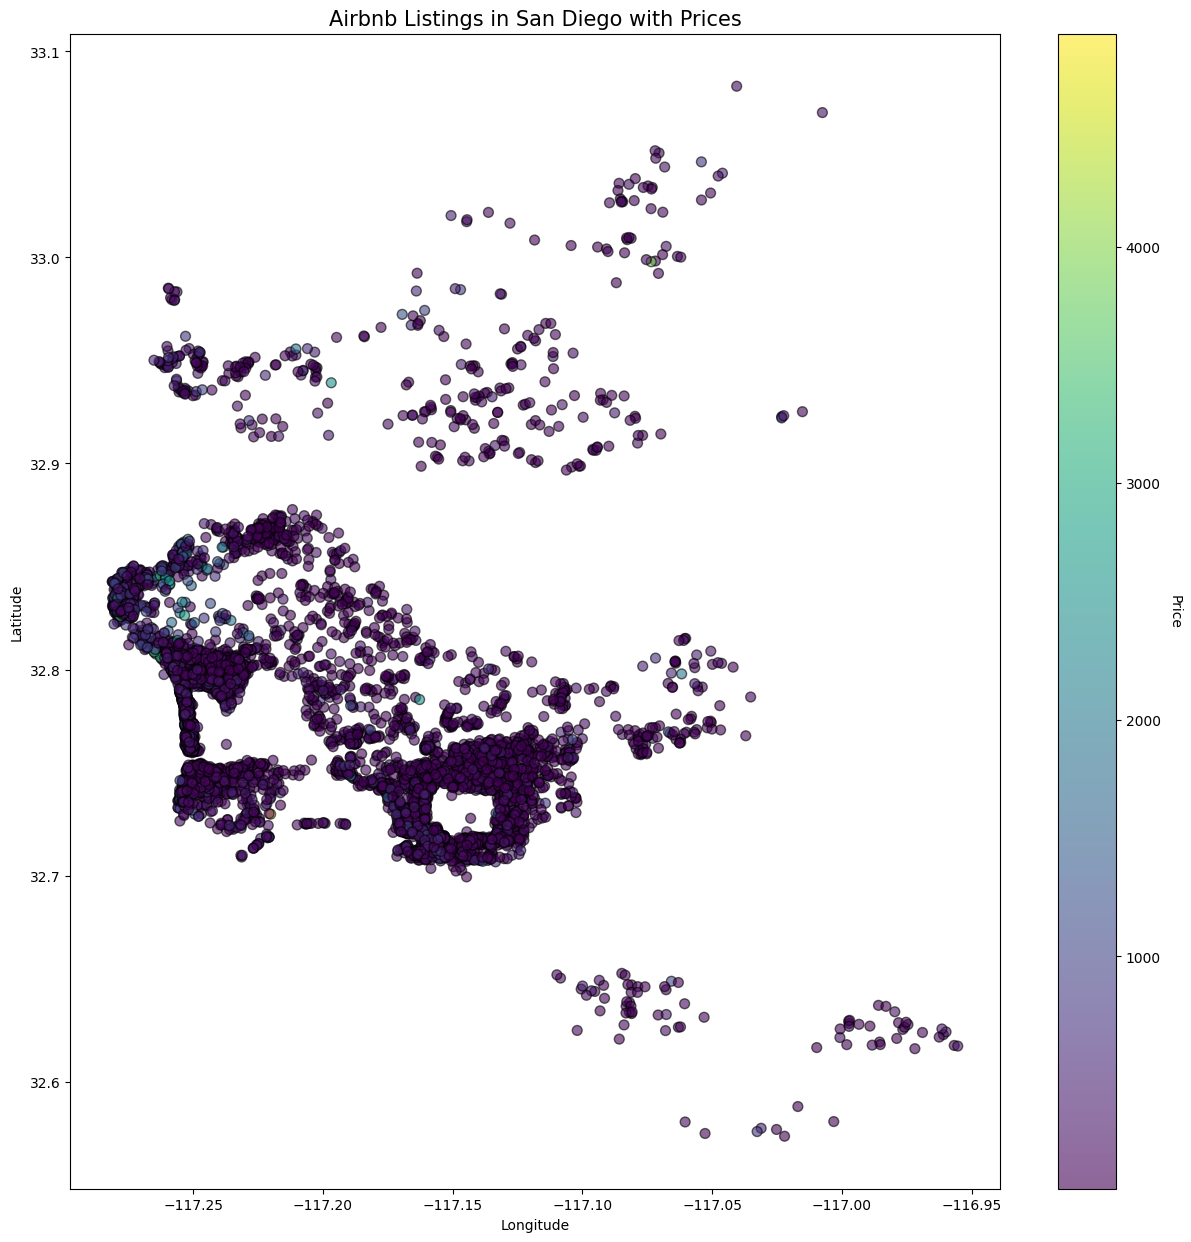

In [111]:
# Load the geojson file into a geodataframe
#Airbnb_listings = gpd.read_file('airbnb_listings.geojson')
#print(Airbnb_listings.head())

# Create a scatter plot of the Airbnb listings
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the geodataframe
scatter = ax.scatter(Airbnb_listings.geometry.x, Airbnb_listings.geometry.y, c=Airbnb_listings['price'], cmap='viridis', s=50, alpha=0.6, edgecolor='k')

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Price', rotation=270, labelpad=15)

# Set plot title and labels
ax.set_title('Airbnb Listings in San Diego with Prices', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#Airbnb_listings.plot(alpha=0.20, ax=ax)
#cx.add_basemap(ax, crs=Airbnb_listings.crs)
#ax.set_axis_off()


plt.show()

+ Accommodates: Listings can accommodate between 1 and 21 people, with a median of 4.
+ Bathrooms: The number of bathrooms ranges from 0 to 10, with a median of 1.
+ Bedrooms: The number of bedrooms ranges from 0 to 10, with a median of 1.
+ Beds: The number of beds ranges from 0 to 16, with a median of 2.
+ Price: Prices range from $18 to $4900 per night, with a median of $139.
+ Room Types and Property Types: Most listings are private rooms or houses, with fewer shared rooms, condominiums, townhouses, and other property types.

# PART 2 Feature Engineering: Get points-of-interest (POIs) and prepare them

Instructions:

* Use the method `features_from_address()` of osmnx to download POIs of the type `amenity` (select the types of amenities to include from this list here: https://wiki.openstreetmap.org/wiki/Key:amenity)
* Pay attention to set the `dist` parameter to an appropiate value 

In [112]:
import osmnx as ox

In [113]:

import geopandas as gpd
from scipy import stats

# Define the address and distance
address = 'San Diego, California, USA'
dist = 5000  # Distance in meters
# If the Distance = 5000, the 'hospital' will not be shown in the POIs, but if the Distance = 10000, the number will not suitable for the KDE later.

# Define the types of amenities to include
amenities = ['restaurant', 'cafe', 'bar', 'hospital', 'parking']

# Download POIs of the specified types
pois = ox.features_from_address(address, tags={'amenity': amenities}, dist=dist)

# Display the first few rows of the POIs GeoDataFrame
pois.head()
print(pois.head())

                       barrier                     geometry  addr:city  \
element_type osmid                                                       
node         286316702     NaN  POINT (-117.15631 32.71273)  San Diego   
             297819169     NaN  POINT (-117.16267 32.71056)  San Diego   
             316551037     NaN  POINT (-117.15097 32.74942)        NaN   
             316725319     NaN  POINT (-117.15981 32.74716)        NaN   
             316725327     NaN  POINT (-117.14592 32.74660)        NaN   

                       addr:housenumber addr:postcode addr:state  \
element_type osmid                                                 
node         286316702              721         92101         CA   
             297819169              222         92101         CA   
             316551037              NaN           NaN        NaN   
             316725319              NaN           NaN        NaN   
             316725327              NaN           NaN        NaN   

    

In [114]:
# Check the types of amenities available
pois['amenity'].value_counts()

amenity
parking       831
restaurant    396
bar           144
cafe          118
hospital        6
Name: count, dtype: int64

Data cleaning: The resulting `pois` geodataframe may have a composite row index. In addition, some POIs may be of a strange element_type. You can use the following code to eliminate these issues.

In [115]:
# Clean the POI data
pois.reset_index(inplace=True) # reset the index of the data frame
pois = pois[pois.element_type=="node"] # eliminate all POIs that are not of the type "node"
pois.head() # check the results

,element_type,osmid,barrier,geometry,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,...,capacity:charging,capacity:parent,beds,operator:wikidata,operator:wikipedia,healthcare:speciality,smoothness,parking:orientation,male,ways
0,node,286316702,NaN,POINT (-117.15631 32.71273),San Diego,721,92101,CA,9th Avenue,restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,297819169,NaN,POINT (-117.16267 32.71056),San Diego,222,92101,CA,Island Avenue,restaurant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,316551037,NaN,POINT (-117.15097 32.74942),NaN,NaN,NaN,NaN,NaN,parking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,316725319,NaN,POINT (-117.15981 32.74716),NaN,NaN,NaN,NaN,NaN,parking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,316725327,NaN,POINT (-117.14592 32.74660),NaN,NaN,NaN,NaN,NaN,parking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Instructions:
* Plot the POIs spatially (use again a background map of San Diego)
* When you use POIs of different amenity types, color the POIs differently

/tmp/ipykernel_641/3939114670.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(amenity_types))


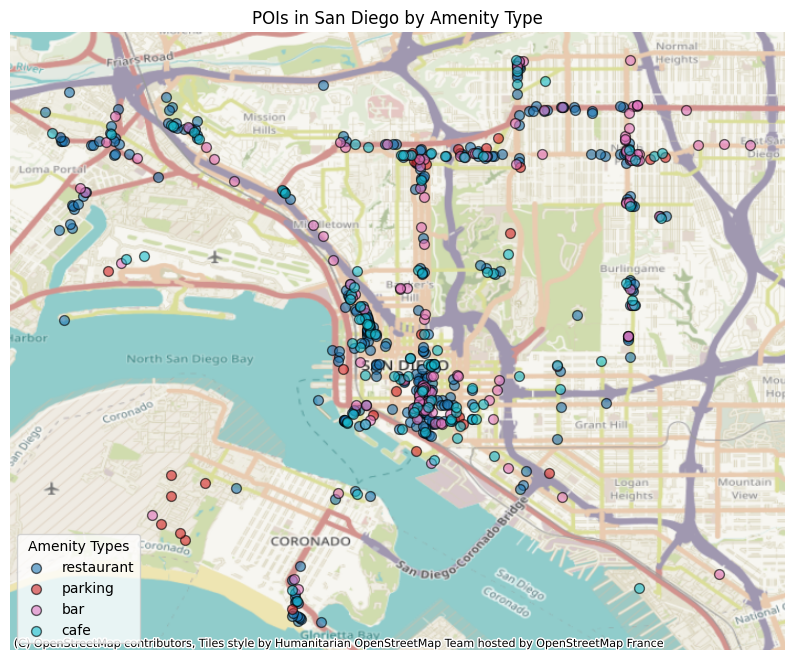

In [116]:
import matplotlib.pyplot as plt
import contextily as cx

Airbnb_listings = gpd.read_file('airbnb_listings.geojson')

# Define colors for different amenities
amenity_types = pois['amenity'].unique()
colors = plt.cm.get_cmap('tab10', len(amenity_types))

# Plot the POIs spatially
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('POIs in San Diego by Amenity Type')

# Plot each amenity type with a different color
for i, amenity in enumerate(amenity_types):
    subset = pois[pois['amenity'] == amenity]
    subset.plot(ax=ax, color=colors(i), markersize=50, label=amenity, alpha=0.6, edgecolor='k')

# Add basemap
#Airbnb_listings.plot(alpha=0.25, ax=ax)
cx.add_basemap(ax, crs=Airbnb_listings.crs)
ax.set_axis_off()

# Add legend
ax.legend(title='Amenity Types')

# Show the plot
plt.show()


For each POI amenity type, create a kernel density estimation (KDE):
* Convert the `geometry` of the POI into a suitable coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Feed the resulting coordinates into the `gaussian_kde` function and estimate the function
* Also convert the `geometry` of the Airbnb listings into the coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Using the converted Airbnb geometries, compute the KDE for the locations of the Airbnb listings
* Add the KDE estimate as additional columns to your original airbnb geodataframe

In [117]:
import numpy as np
from scipy import stats

def create_coordinate_array(geometry):
    return np.array([point.coords[0] for point in geometry])

# Convert the geometry of the Airbnb listings into coordinates
airbnb_coords = create_coordinate_array(Airbnb_listings.geometry)

# Perform KDE for the Airbnb listings
kde_airbnb = stats.gaussian_kde(airbnb_coords.T)

# Display the first few rows of the updated Airbnb listings data
Airbnb_listings.head()

# Define grid points
x_min, y_min = airbnb_coords.min(axis=0)
x_max, y_max = airbnb_coords.max(axis=0)
x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]  # 100x100 grid
grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate KDE on grid points
kde_values = kde_airbnb(grid_coords).reshape(100, 100)

# Add the KDE estimate as an additional column to the original Airbnb GeoDataFrame
Airbnb_listings['kde_estimate'] = kde_airbnb(airbnb_coords.T)

# Display the first few rows of the updated Airbnb listings data
print(Airbnb_listings.head())

   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse  price  \
0               0         1         0             0  425.0   
1               1         0         0             0  205.0   
2               0         0         0             0   99.0   
3               0         1         0             0   72.0   
4               0         1         0             0   55.0   

                      geometry  kde_estimate  
0  POINT (-117.12971 32.75399)     58.758892  
1  POINT (-117.25253 32.78421)    106.179272  
2  POINT (-

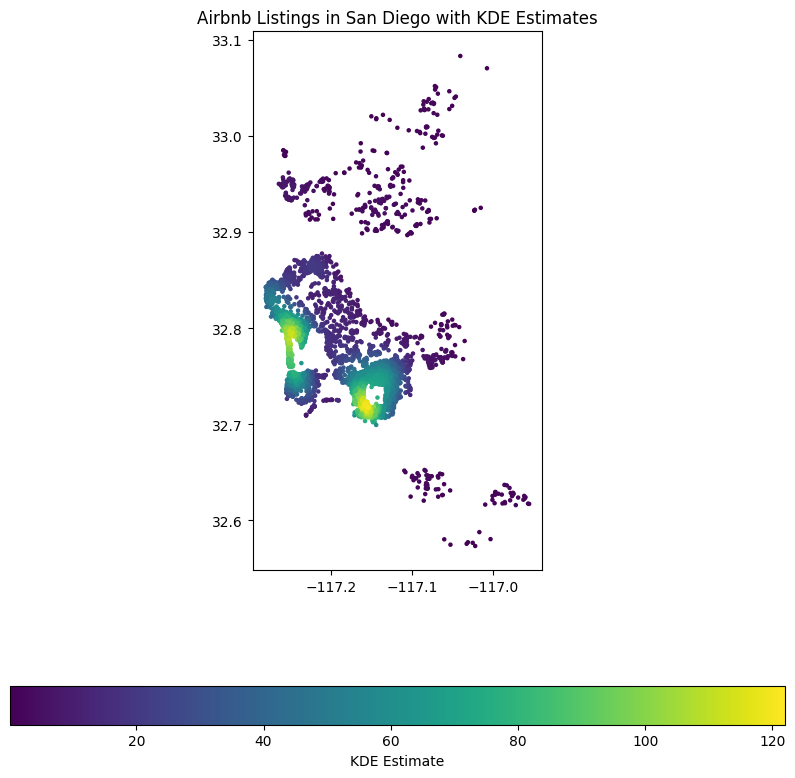

In [118]:
import matplotlib.colors as mcolors

# Plot the Airbnb listings with KDE estimates
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Airbnb_listings.plot(column='kde_estimate', ax=ax, legend=True,
                     cmap='viridis', markersize=5,
                     legend_kwds={'label': "KDE Estimate", 'orientation': "horizontal"})
ax.set_title('Airbnb Listings in San Diego with KDE Estimates')
plt.show()


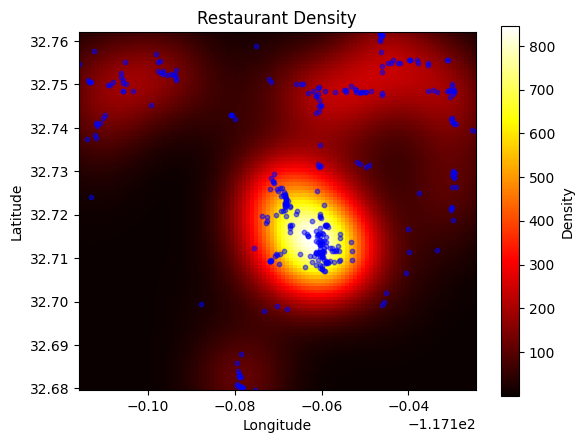

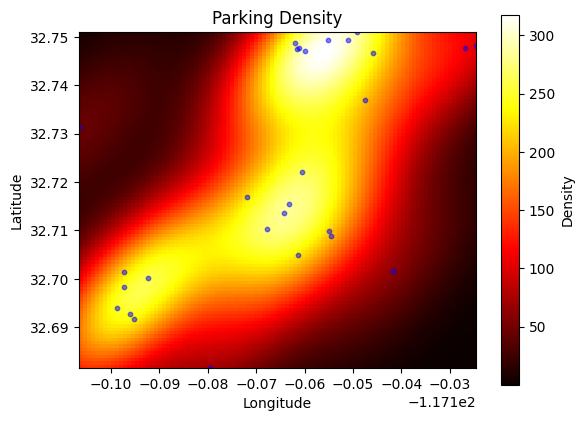

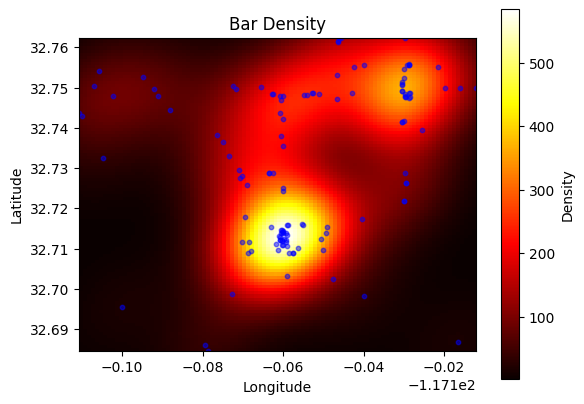

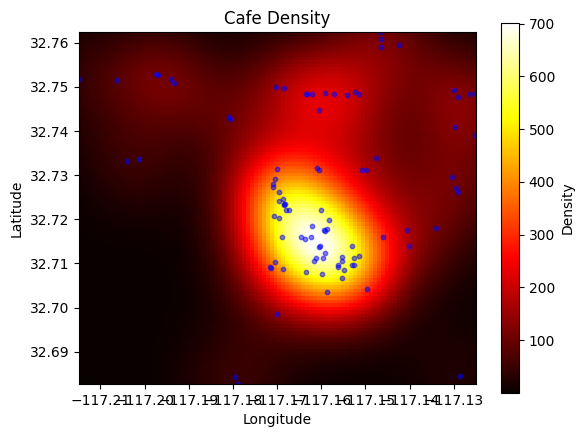

In [119]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from scipy import stats

# Function to get POIs from a specific address
def get_pois(address, dist, amenities):
    pois = ox.features_from_address(address, tags={"amenity": amenities}, dist=dist)
    return pois

# Clean the POI data
def clean_pois(pois):
    pois.reset_index(inplace=True)
    pois = pois[pois.element_type == "node"]
    return pois

# Helper function to create a coordinate array
def create_coordinate_array(geometry):
    coords = np.array(list(geometry.apply(lambda x: (x.x, x.y))))
    return coords

# Function to plot KDE
def plot_kde(coords, kde_values, x_min, x_max, y_min, y_max, x_values, y_values, title='Density Plot'):
    plt.imshow(np.rot90(kde_values), cmap='hot', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar(label='Density')
    plt.scatter(x_values, y_values, s=10, c='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Compute KDE for each amenity type and plot the result
for amenity in amenity_types:
    subset = pois[pois['amenity'] == amenity]
    if not subset.empty:
        coords = create_coordinate_array(subset.geometry)
        kde = stats.gaussian_kde(coords.T)
        
        # Define grid points
        x_min, y_min = coords.min(axis=0)
        x_max, y_max = coords.max(axis=0)
        x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]  # 100x100 grid
        grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])
        
        # Evaluate KDE on grid points
        kde_values = kde(grid_coords).reshape(100, 100)
        
        # Plot the KDE
        plot_kde(coords, kde_values, x_min, x_max, y_min, y_max, coords[:, 0], coords[:, 1], title=f'{amenity.capitalize()} Density')

# Assuming airbnb_gdf is your GeoDataFrame with Airbnb listings
# Compute KDE values for Airbnb listings
airbnb_coords = create_coordinate_array(Airbnb_listings.geometry)
airbnb_kde = stats.gaussian_kde(airbnb_coords.T)

# Define grid points for Airbnb listings
x_min, y_min = airbnb_coords.min(axis=0)
x_max, y_max = airbnb_coords.max(axis=0)
x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]  # 100x100 grid
grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate KDE on grid points
kde_values = airbnb_kde(grid_coords).reshape(100, 100)

# Compute KDE values for Airbnb listings and add as a new column
Airbnb_listings['kde'] = airbnb_kde(airbnb_coords.T)

# Plot the KDE for Airbnb listings
#plot_kde(airbnb_coords, kde_values, x_min, x_max, y_min, y_max, airbnb_coords[:, 0], airbnb_coords[:, 1], title='Airbnb Density')


In [120]:
# Compute KDE for each amenity type and plot the result
#for amenity in amenity_types:
   # subset = pois[pois['amenity'] == amenity]
    #if not subset.empty:
     #   coords = create_coordinate_array(subset.geometry)
       # kde = stats.gaussian_kde(coords.T)
        
        # Define grid points
       # x_min, y_min = coords.min(axis=0)
        #x_max, y_max = coords.max(axis=0)
       # x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]  # 100x100 grid
       # grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])
        
        # Evaluate KDE on grid points
      # kde_values = kde(grid_coords).reshape(100, 100)
        
        # Plot the KDE result with a chosen colormap
      #  fig, ax = plt.subplots(figsize=(10, 10))
        #ax.imshow(np.rot90(kde_values), cmap=plt.cm.viridis, extent=[x_min, x_max, y_min, y_max])
       # ax.plot(coords[:, 0], coords[:, 1], 'k.', markersize=5)
       # ax.set_title(f'KDE of {amenity.capitalize()} in San Diego')

       # plt.show()

   

Create a spatial point plot(s) of the Airbnb listings and color the points according to the KDE estimates, in order to check your results.

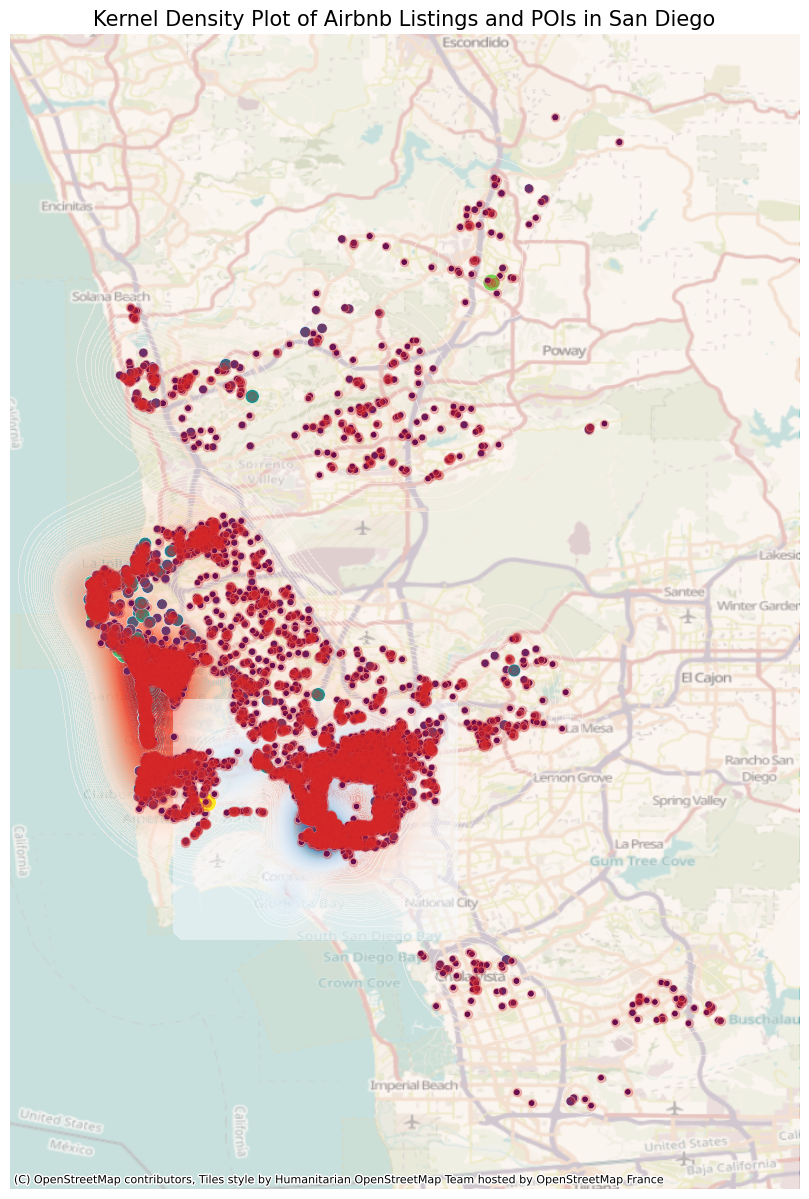

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

def create_coordinate_array(geometry):
    return np.array([point.coords[0] for point in geometry])

Airbnb_listings = gpd.read_file('airbnb_listings.geojson')
# Convert GeoDataFrame to DataFrame with longitude and latitude columns for seaborn
Airbnb_listings['longitude'] = Airbnb_listings.geometry.x
Airbnb_listings['latitude'] = Airbnb_listings.geometry.y

# Convert POIs GeoDataFrame to DataFrame with longitude and latitude columns for seaborn
pois['longitude'] = pois.geometry.x
pois['latitude'] = pois.geometry.y

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Plot KDE for Airbnb listings
sns.kdeplot(
    data=Airbnb_listings,
    x='longitude',
    y='latitude',
    fill=True,
    thresh=0,
    levels=100,
    cmap="Reds",
    alpha=0.5,
    ax=ax
)

# Plot KDE for POIs
sns.kdeplot(
    data=pois,
    x='longitude',
    y='latitude',
    fill=True,
    thresh=0,
    levels=100,
    cmap="Blues",
    alpha=0.5,
    ax=ax
)

# Plot Airbnb listings as points
sns.scatterplot(
    data=Airbnb_listings,
    x='longitude',
    y='latitude',
    hue='price',
    palette='viridis',
    size='price',
    sizes=(20, 180),
    legend=None,
    ax=ax
)

# Set plot title and labels
ax.set_title('Kernel Density Plot of Airbnb Listings and POIs in San Diego', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

Airbnb_listings.plot(alpha=0.25, ax=ax)
cx.add_basemap(ax, crs=Airbnb_listings.crs)
ax.set_axis_off()

plt.show()


# PART 3: Modeling and Analysis (aka Machine Learning)

Use your dataset generated in the previous steps to predict AirBnb prices

Instructions:

* Split your data set into training and validation data sets
* Define an error metric (or several)
* Train at least one machine learning model (e.g. random forest) 
* Tune the hyperparameters (if applicable for the model)
* Evaluate the accuracy of the predicted prices against actual prices
* Compare the performance of the previous models when using different input data sets (benchmarks). Make sure to include the naive benchmark of predicting always the mean price.

In [122]:
# clean the data, remove the the row with empty data
Airbnb_listings.dropna(axis=0, inplace=True)
print(Airbnb_listings)

      accommodates  bathrooms  bedrooms  beds  rt_Private_room  \
0                5        2.0       2.0   2.0                0   
1                6        1.0       2.0   4.0                0   
2                2        1.0       1.0   1.0                1   
3                2        1.0       1.0   1.0                1   
4                2        1.0       1.0   1.0                1   
...            ...        ...       ...   ...              ...   
6105             2        1.0       1.0   1.0                1   
6106             6        2.0       2.0   2.0                0   
6107             1        1.0       1.0   1.0                1   
6108             3        1.0       1.0   1.0                0   
6109             3        1.0       1.0   2.0                0   

      rt_Shared_room  pg_Condominium  pg_House  pg_Other  pg_Townhouse  price  \
0                  0               0         1         0             0  425.0   
1                  0               1         

In [123]:
Airbnb_listings['longitude'] = Airbnb_listings['geometry'].apply(lambda p: p.x)
Airbnb_listings['latitute'] = Airbnb_listings['geometry'].apply(lambda p:p.y)
Airbnb_listings = Airbnb_listings.drop(columns = ['geometry'])
Airbnb_listings.head()

,accommodates,bathrooms,bedrooms,beds,rt_Private_room,rt_Shared_room,pg_Condominium,pg_House,pg_Other,pg_Townhouse,price,longitude,latitude,latitute
0,5,2.0,2.0,2.0,0,0,0,1,0,0,425.0,-117.129705,32.753993,32.753993
1,6,1.0,2.0,4.0,0,0,1,0,0,0,205.0,-117.252533,32.784212,32.784212
2,2,1.0,1.0,1.0,1,0,0,0,0,0,99.0,-117.141208,32.753266,32.753266
3,2,1.0,1.0,1.0,1,0,0,1,0,0,72.0,-117.152685,32.931104,32.931104
4,2,1.0,1.0,1.0,1,0,0,1,0,0,55.0,-117.218701,32.742020,32.742020


In [124]:
print(Airbnb_listings.columns)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'rt_Private_room',
       'rt_Shared_room', 'pg_Condominium', 'pg_House', 'pg_Other',
       'pg_Townhouse', 'price', 'longitude', 'latitude', 'latitute'],
      dtype='object')


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import geopandas as gpd

Airbnb_listings = gpd.read_file('airbnb_listings.geojson')

# Verify if 'kde_estimate' column is present, if not compute it
if 'kde_estimate' not in Airbnb_listings.columns:
    def create_coordinate_array(geometry):
        return np.array([point.coords[0] for point in geometry])

    # Convert the geometry of the Airbnb listings into coordinates
    airbnb_coords = create_coordinate_array(Airbnb_listings.geometry)

    # Perform KDE for the Airbnb listings
    kde_airbnb = stats.gaussian_kde(airbnb_coords.T)

    # Add the KDE estimate as an additional column to the original Airbnb GeoDataFrame
    Airbnb_listings['kde_estimate'] = kde_airbnb(airbnb_coords.T)

# Ensure necessary features are included
Airbnb_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'kde_estimate']
Airbnb_listings = Airbnb_listings[Airbnb_features + ['price']]

# Drop rows with missing values
Airbnb_listings.dropna(inplace=True)

# Split the data into training and validation sets
X = Airbnb_listings.drop('price', axis=1)
y = Airbnb_listings['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X.head()
X.describe().T


(4888, 5) (1222, 5) (4888,) (1222,)


,count,mean,std,min,25%,50%,75%,max
accommodates,6110.0,4.220786,2.840703,1.000000,2.000000,4.000000,6.000000,21.000000
bathrooms,6110.0,1.475286,0.863803,0.000000,1.000000,1.000000,2.000000,10.000000
bedrooms,6110.0,1.589198,1.136234,0.000000,1.000000,1.000000,2.000000,10.000000
beds,6110.0,2.196399,1.712917,0.000000,1.000000,2.000000,3.000000,16.000000
kde_estimate,6110.0,61.724280,35.935495,0.149573,28.382974,63.798525,94.366112,121.975915


### the shapes of the training and validation datasets after the split:

+ (4888, 5): The training feature set X_train has 4888 samples and 5 features.
+ (1222, 5): The validation feature set X_val has 1222 samples and 5 features.
+ (4888,): The training target set y_train has 4888 samples.
+ (1222,): The validation target set y_val has 1222 samples.
+ The data was split into training (80%) and validation (20%) sets.

In [126]:
# Define error metrics
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

def print_metrics(y_true, y_pred):
    mae, mse, r2 = get_metrics(y_true, y_pred)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")
    return mae, mse, r2

## Model 1: Random Forest

In [127]:
from sklearn.model_selection import RandomizedSearchCV

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf.predict(X_val)

# Evaluate the model
#print("Random Forest Performance:")
#rf_metrics = print_metrics(y_val, y_pred)

# Evaluate the model
print("Random Forest Performance:")
rf_metrics = print_metrics(y_val, y_pred)
print(f"rf_metrics: {rf_metrics}") 

# Tune hyperparameters with GridSearchCV
# Define a smaller parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best model from random search
best_rf = random_search.best_estimator_

# Predict on the validation set with the best model
y_pred_best = best_rf.predict(X_val)

# Evaluate the best model
print("Best Random Forest Performance after Hyperparameter Tuning:")
best_rf_metrics = print_metrics(y_val, y_pred_best)
print(f"best_rf_metrics: {best_rf_metrics}")  # Debugging line

# Naive benchmark: Predict the mean price
mean_price = np.mean(y_train)
y_pred_naive = np.full_like(y_val, mean_price)

print("Naive Benchmark Performance:")
naive_metrics = print_metrics(y_val, y_pred_naive)
print(f"naive_metrics: {naive_metrics}")  # Debugging line

# Compare performance
print("\nComparison of Model Performances:")
print(f"Random Forest MAE: {rf_metrics[0]}, Best RF MAE: {best_rf_metrics[0]}, Naive MAE: {naive_metrics[0]}")
print(f"Random Forest MSE: {rf_metrics[1]}, Best RF MSE: {best_rf_metrics[1]}, Naive MSE: {naive_metrics[1]}")
print(f"Random Forest R-squared: {rf_metrics[2]}, Best RF R-squared: {best_rf_metrics[2]}, Naive R-squared: {naive_metrics[2]}")

Random Forest Performance:
MAE: 96.29576104746317
MSE: 40398.82854271686
R-squared: 0.44160796233170374
rf_metrics: (96.29576104746317, 40398.82854271686, 0.44160796233170374)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, ma

/home/vscode/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
81 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.local/li

Best Random Forest Performance after Hyperparameter Tuning:
MAE: 81.9451659142402
MSE: 26953.755401178973
R-squared: 0.6274455734437245
best_rf_metrics: (81.9451659142402, 26953.755401178973, 0.6274455734437245)
Naive Benchmark Performance:
MAE: 150.37733277795786
MSE: 72357.59994900502
R-squared: -0.00012572477417482908
naive_metrics: (150.37733277795786, 72357.59994900502, -0.00012572477417482908)

Comparison of Model Performances:
Random Forest MAE: 96.29576104746317, Best RF MAE: 81.9451659142402, Naive MAE: 150.37733277795786
Random Forest MSE: 40398.82854271686, Best RF MSE: 26953.755401178973, Naive MSE: 72357.59994900502
Random Forest R-squared: 0.44160796233170374, Best RF R-squared: 0.6274455734437245, Naive R-squared: -0.00012572477417482908


In [128]:
# w/o preprocessing
from sklearn.impute import SimpleImputer

# Imputation
simple_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_val))

# "Repair" column names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_val.columns

def score_dataset(X_train, X_valid, y_train, y_valid):
    new_forest_model = RandomForestRegressor(n_estimators=100, random_state=1)
    new_forest_model.fit(X_train, y_train)
    preds = new_forest_model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

mae_imputation = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_val)
print("MAE using Imputation: {}".format(mae_imputation))

MAE using Imputation: 94.2392062193126


## Model 2: DecisionTree

In [129]:
from sklearn.tree import DecisionTreeRegressor

# Define
gdf_model = DecisionTreeRegressor(random_state=1)

# Fit
gdf_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [130]:
y.head()

0    425.0
1    205.0
2     99.0
3     72.0
4     55.0
Name: price, dtype: float64

In [131]:
print("Making predictions for the following 5 house:")
print(X.head())
print("The predictions are")
print(gdf_model.predict(X.head()))

Making predictions for the following 5 house:
   accommodates  bathrooms  bedrooms  beds  kde_estimate
0             5        2.0       2.0   2.0     58.758892
1             6        1.0       2.0   4.0    106.179272
2             2        1.0       1.0   1.0     66.481142
3             2        1.0       1.0   1.0      4.139714
4             2        1.0       1.0   1.0     23.267363
The predictions are
[425. 205.  99.  72.  55.]


In [132]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = gdf_model.predict(X)
print(predicted_home_prices)
print(y)
mae = mean_absolute_error(y, predicted_home_prices)

print("The MAE of our model is: {}".format(mae))

[425. 205.  99. ...  65. 170.  75.]
0       425.0
1       205.0
2        99.0
3        72.0
4        55.0
        ...  
6105     79.0
6106    295.0
6107     65.0
6108    170.0
6109     75.0
Name: price, Length: 6110, dtype: float64
The MAE of our model is: 0.0


In [133]:
from sklearn.model_selection import train_test_split

# Split the data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Build the model
gdf_model = DecisionTreeRegressor(random_state=1)
gdf_model.fit(train_X, train_y)

# Evaluate the performance
val_predictions = gdf_model.predict(val_X)
val_mae = mean_absolute_error(val_y, val_predictions)

print("The MAE of our model is: {}".format(val_mae))

The MAE of our model is: 122.62958115183245


In [134]:
# 4. Tune the hyperparameters
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [2, 5, 50, 500, 5000, 10000]:
    is_mae = get_mae(max_leaf_nodes, X, X, y, y)
    oos_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t In-sample:  %d \t Out-of-sample:  %d" %(max_leaf_nodes, is_mae, oos_mae))

Max leaf nodes: 2  	 In-sample:  132 	 Out-of-sample:  134
Max leaf nodes: 5  	 In-sample:  97 	 Out-of-sample:  114
Max leaf nodes: 50  	 In-sample:  78 	 Out-of-sample:  102
Max leaf nodes: 500  	 In-sample:  46 	 Out-of-sample:  109
Max leaf nodes: 5000  	 In-sample:  0 	 Out-of-sample:  121
Max leaf nodes: 10000  	 In-sample:  0 	 Out-of-sample:  121


In [135]:
# 6. Compare the performance of the previous models when using different input data sets

# Load dataset
new_gdf = gpd.read_file('airbnb_listings.geojson')
#data = pd.read_csv('airbnb_listings.geojson')
data = pd.DataFrame(new_gdf.drop(columns='geometry'))

# Target variable
y = data['price']

# Drop non-numeric variables
melb_predictors = data.drop(['price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [136]:
from sklearn.impute import SimpleImputer

# Imputation
simple_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_valid))

# "Repair" column names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

def decision_tree_dataset(X_train, X_valid, y_train, y_valid):
    pre_decision_tree_model = DecisionTreeRegressor(random_state=1)
    pre_decision_tree_model.fit(X_train, y_train)
    preds_val = pre_decision_tree_model.predict(X_valid)
    return mean_absolute_error(y_valid, preds_val)
    #mae = mean_absolute_error(val_y, preds_val)
    #return(mae)
decisionTree_mae_imputation = decision_tree_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
print("MAE using Imputation: {}".format(decisionTree_mae_imputation))

MAE using Imputation: 101.2932307467636
